<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-Packages" data-toc-modified-id="1.-Import-Packages-1">1. Import Packages</a></span></li><li><span><a href="#2.-Read-in-Data" data-toc-modified-id="2.-Read-in-Data-2">2. Read in Data</a></span></li><li><span><a href="#3.-Combining-Dataframes" data-toc-modified-id="3.-Combining-Dataframes-3">3. Combining Dataframes</a></span></li><li><span><a href="#4.-Creating-Positive-Class" data-toc-modified-id="4.-Creating-Positive-Class-4">4. Creating Positive Class</a></span></li><li><span><a href="#5.-Data-Cleaning" data-toc-modified-id="5.-Data-Cleaning-5">5. Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-5.1">Null Values</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-5.2">Data Types</a></span></li></ul></li><li><span><a href="#6.-Preprocessing-and-Feature-Engineering" data-toc-modified-id="6.-Preprocessing-and-Feature-Engineering-6">6. Preprocessing and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Date/Time-Information" data-toc-modified-id="Date/Time-Information-6.1">Date/Time Information</a></span></li><li><span><a href="#Dummy-Variables" data-toc-modified-id="Dummy-Variables-6.2">Dummy Variables</a></span></li><li><span><a href="#Interaction-Columns:-Part-1" data-toc-modified-id="Interaction-Columns:-Part-1-6.3">Interaction Columns: Part 1</a></span></li><li><span><a href="#Expanding-on-Rate-Statistics" data-toc-modified-id="Expanding-on-Rate-Statistics-6.4">Expanding on Rate Statistics</a></span></li><li><span><a href="#Obtaining-Season-to-Date-Statistics" data-toc-modified-id="Obtaining-Season-to-Date-Statistics-6.5">Obtaining Season to Date Statistics</a></span></li><li><span><a href="#Interaction-Columns:-Part-2" data-toc-modified-id="Interaction-Columns:-Part-2-6.6">Interaction Columns: Part 2</a></span></li></ul></li><li><span><a href="#7.-Exploratory-Data-Analysis" data-toc-modified-id="7.-Exploratory-Data-Analysis-7">7. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Setting-Potential-Features" data-toc-modified-id="Setting-Potential-Features-7.1">Setting Potential Features</a></span></li><li><span><a href="#Injury-Timeline---When-Do-Injuries-Occur" data-toc-modified-id="Injury-Timeline---When-Do-Injuries-Occur-7.2">Injury Timeline - When Do Injuries Occur</a></span></li><li><span><a href="#Correlation-Deep-Dive" data-toc-modified-id="Correlation-Deep-Dive-7.3">Correlation Deep Dive</a></span><ul class="toc-item"><li><span><a href="#Injury-in-Next-Month-Correlations" data-toc-modified-id="Injury-in-Next-Month-Correlations-7.3.1">Injury in Next Month Correlations</a></span></li><li><span><a href="#Injury-in-Next-Three-Weeks-Correlations" data-toc-modified-id="Injury-in-Next-Three-Weeks-Correlations-7.3.2">Injury in Next Three Weeks Correlations</a></span></li><li><span><a href="#Injury-in-Next-Two-Weeks" data-toc-modified-id="Injury-in-Next-Two-Weeks-7.3.3">Injury in Next Two Weeks</a></span></li><li><span><a href="#Injury-in-Next-Week" data-toc-modified-id="Injury-in-Next-Week-7.3.4">Injury in Next Week</a></span></li><li><span><a href="#Injury-in-Upcoming-Game" data-toc-modified-id="Injury-in-Upcoming-Game-7.3.5">Injury in Upcoming Game</a></span></li></ul></li></ul></li><li><span><a href="#8.-Saving-Modeling-Data-Frame" data-toc-modified-id="8.-Saving-Modeling-Data-Frame-8">8. Saving Modeling Data Frame</a></span></li></ul></div>

# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, BaggingRegressor, AdaBoostRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, confusion_matrix
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 2. Read in Data

In [3]:
inj = pd.read_csv('../data/injuries_clean.csv')
nba18 = pd.read_csv('../data/2017_2018_game_logs.csv')
nba17 = pd.read_csv('../data/2016_2017_game_logs.csv')
nba16 = pd.read_csv('../data/2015_2016_game_logs.csv')

# 3. Combining Dataframes

In order to be able to successfully track whether or not an injury was suffered in a given game, we want to create a new data frame combining the injuries frames with the game log data.  To do this, we first need to ensure the columns align, so we will need to add empty columns to the injury frame.  Additionally, we want to edit the injury data frame so that the dates are in line with the 2015-2018 NBA game log data we have.

In [4]:
# first we know we can clean out the unnamed: 0 column in each frame
inj.drop(columns = ['Unnamed: 0'], inplace = True)
nba18.drop(columns = ['Unnamed: 0'], inplace = True)
nba17.drop(columns = ['Unnamed: 0'], inplace = True)
nba16.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
# setting masks for the date for each season of data
start_18 = '2017-10-17'
end_18 = '2018-06-08'
start_17 = '2016-10-25'
end_17 = '2017-06-12'
start_16 = '2015-10-27'
end_16 = '2016-06-19'
# resetting our injury data frame to only be for the range of nba game logs that we have
inj = inj[((inj['date'] >= start_18) & (inj['date'] <= end_18)) |
    ((inj['date'] >= start_17) & (inj['date'] <= end_17)) |
    ((inj['date'] >= start_16) & (inj['date'] <= end_16))]

In [6]:
# we also want to add season identifiers to the season frames for sorting
nba18['season'] = 2018
nba17['season'] = 2017
nba16['season'] = 2016

In [7]:
# adding new columns to the injury data frame for the merge
inj_new_cols = list(set(nba18.columns) - set(inj.columns))
for col in inj_new_cols:
    inj[col] = ''
# additionally we want to add two new columns to this frame to note that they come from the injury frame
inj['inj_frame'] = 1
inj['injury'] = 1

In [8]:
nba_new_cols = list(set(inj.columns) - set(nba18.columns))
for col in nba_new_cols:
    nba18[col] = ''
    nba17[col] = ''
    nba16[col] = ''

In [9]:
# next we want to reset columns to our preferred order to then merge the frames together
col_list = ['date', 'season','name', 'age', 'inj_frame', 'injury', 'position', 'height', 'location', 'opponent',
       'result', 'games_to_date', 'days_off', 'team_pts', 'opp_pts',
       'total_points', 'mins_played', 'mins_played_to_date', 'avg_mins_played',
       'pts_scored', 'rebounds', 'assists', 'fg_made_attempts', 'fg_attempts',
       'fg_attempts_to_date', '3p_made_attempts', 'ft_made_attempts',
       'ft_attempts', 'ft_attempts_to_date', 'usage_percentile', 'usage',
       'psa_pct', 'psa', 'ast%_pct', 'ast%', 'tov%_pct', 'tov%', 'astd%_pct',
       'astd%', 'fgor%_pct', 'fgor%', 'fgdr%_pct', 'fgdr%', 'block%_pct',
       'block%', 'stl%_pct', 'stl%',  'notes']

nba18 = nba18.reindex(columns = col_list)
nba17 = nba17.reindex(columns = col_list)
nba16 = nba16.reindex(columns = col_list)
inj = inj.reindex(columns = col_list)

In [10]:
# concatenating our dataframes together
data = pd.concat([nba18, nba17, nba16, inj], axis = 0)

In [11]:
data = data.sort_values(['name', 'date'])
data.reset_index(drop = True, inplace = True)
data['date'] = pd.to_datetime(data['date'])

# 4. Creating Positive Class

We want to create a new column to mark if we believe an injury was suffered in an individual game.  We do this by tracking the announcement of the injury and move back to the most recent game played row and mark that with a 1 for our positive class.

In [12]:
data['injury_suff'] = 0
for row in range(1, data.shape[0]):
    if (data.loc[row, 'inj_frame'] == 1) & (data.loc[row, 'name'] == data.loc[(row-1), 'name']):
        data.loc[(row-1), 'injury_suff'] = 1

Our big problem with this is we have severely unbalanced classes with 97.5% in the no injury class and only 2.5% in the positive injury class.  As such, we want to create some new potential target classes to close up this gap by expanding the window out on injury suffering.  Essentially, we want to see what the odds are the player suffers an injury in the next one/two/three weeks should they play in this game.

In [13]:
data['1week_inj'] = 0
for row in range(1, data.shape[0]):
    if data.loc[row, 'injury_suff'] == 1:
        name = data.loc[row, 'name']
        name_df = data[data['name'] == name]
        name_df.reset_index(inplace = True)
        date = data.loc[row, 'date']
        for row2 in range(name_df.shape[0]):
            # note that we use 8 days for one week since the announcements come after the injury is suffered
            if ((date - name_df.loc[row2, 'date']).days <= 8) & ((date - name_df.loc[row2, 'date']).days >= 0):
                index = name_df.loc[row2, 'index']
                data.loc[index, '1week_inj'] = 1
                
data['2week_inj'] = 0
for row in range(1, data.shape[0]):
    if data.loc[row, 'injury_suff'] == 1:
        name = data.loc[row, 'name']
        name_df = data[data['name'] == name]
        name_df.reset_index(inplace = True)
        date = data.loc[row, 'date']
        for row2 in range(name_df.shape[0]):
            if ((date - name_df.loc[row2, 'date']).days <= 15) & ((date - name_df.loc[row2, 'date']).days >= 0):
                index = name_df.loc[row2, 'index']
                data.loc[index, '2week_inj'] = 1
                
data['3week_inj'] = 0
for row in range(1, data.shape[0]):
    if data.loc[row, 'injury_suff'] == 1:
        name = data.loc[row, 'name']
        name_df = data[data['name'] == name]
        name_df.reset_index(inplace = True)
        date = data.loc[row, 'date']
        for row2 in range(name_df.shape[0]):
            if ((date - name_df.loc[row2, 'date']).days <= 22) & ((date - name_df.loc[row2, 'date']).days >= 0):
                index = name_df.loc[row2, 'index']
                data.loc[index, '3week_inj'] = 1
                
data['1month_inj'] = 0
for row in range(1, data.shape[0]):
    if data.loc[row, 'injury_suff'] == 1:
        name = data.loc[row, 'name']
        name_df = data[data['name'] == name]
        name_df.reset_index(inplace = True)
        date = data.loc[row, 'date']
        for row2 in range(name_df.shape[0]):
            if ((date - name_df.loc[row2, 'date']).days <= 32) & ((date - name_df.loc[row2, 'date']).days >= 0):
                index = name_df.loc[row2, 'index']
                data.loc[index, '1month_inj'] = 1

We can now drop the injury frame rows as we no longer need them for our target labeling.

In [14]:
data = data[data['inj_frame'] != 1]
data.drop(columns = ['inj_frame', 'injury', 'notes'], inplace = True)

In [15]:
data.reset_index(drop = True, inplace = True)

# 5. Data Cleaning

## Null Values

Our null values are concentrated solely in the columns related to advanced stats from Cleaning the Glass.

The percentile ranks, per the site, are "the percentile rank for that stat compared to all other games this season played by players at their position grouping with more than 5 minutes played in the game".  These figures often show up as blank when the numbers are either 0 or 100.  

First, in some of the columns over or nearly 50% of the values are nulls - we will drop these columns. 

In [16]:
data.drop(columns = ['astd%_pct', 'fgor%_pct', 'fgdr%_pct', 'block%_pct', 'stl%_pct'], inplace = True)

In examining the data, the remaining nulls for percentile are most commonly when the figure is 0 and as such, we can assume the percentile ranks are zero. 

In [17]:
null_zero = ['ast%_pct', 'tov%_pct', 'tov%_pct', 'psa_pct', 'usage_percentile']
for col in null_zero:
    data[col].fillna(0, inplace = True)

There are a substantial amount of missing values for PSA, Astd %, and TOV %.  Our big concern with dropping these rows would be further unbalancing our classes/losing too much data.  However, after viewing the injury rates in these rows, we see that we do not further unbalance our classes.  Additionally, we are still left with over 64,000 rows of data after making this change.

In [18]:
mask1 = data['astd%'].notna()
mask2 = data['psa'].notna()
mask3 = data['tov%'].notna()
data = data[mask1 & mask2 & mask3]
data.reset_index(drop = True, inplace = True)

Finally, we want to fill our remaining nulls for Ast %, FGOR %, FGDR %, and Block % with zero.  

In [19]:
data.fillna(0, inplace = True)

## Data Types

In [20]:
data.dtypes

date                   datetime64[ns]
season                          int64
name                           object
age                           float64
position                       object
height                          int64
location                       object
opponent                       object
result                         object
games_to_date                   int64
days_off                        int64
team_pts                        int64
opp_pts                         int64
total_points                    int64
mins_played                     int64
mins_played_to_date             int64
avg_mins_played               float64
pts_scored                      int64
rebounds                        int64
assists                         int64
fg_made_attempts               object
fg_attempts                     int64
fg_attempts_to_date             int64
3p_made_attempts               object
ft_made_attempts               object
ft_attempts                     int64
ft_attempts_

Next, we need to ensure all of our numeric values are properly reflected as such.  The ones that need to be adjusted are the stats with a percentage in the output.  We will need to clear this percentage sign and then can convert the figures to floats.

In [21]:
pct_cols = ['usage', 'tov%', 'astd%', 'fgor%', 'fgdr%', 'block%', 'stl%', 'ast%']

data['tov%'] = [i.replace('%', '')  if type(i) == str else i for i in data['tov%']]
data['astd%'] = [i.replace('%', '')  if type(i) == str else i for i in data['astd%']]
data['fgor%'] = [i.replace('%', '')  if type(i) == str else i for i in data['fgor%']]
data['fgdr%'] = [i.replace('%', '')  if type(i) == str else i for i in data['fgdr%']]
data['block%'] = [i.replace('%', '')  if type(i) == str else i for i in data['block%']]
data['stl%'] = [i.replace('%', '')  if type(i) == str else i for i in data['stl%']]
data['usage'] = [i.replace('%', '')  if type(i) == str else i for i in data['usage']]
data['ast%'] = [i.replace('%', '')  if type(i) == str else i for i in data['ast%']]

for cols in pct_cols:
    data[cols] = data[cols].map(lambda val : float(val))

In [22]:
data.dtypes

date                   datetime64[ns]
season                          int64
name                           object
age                           float64
position                       object
height                          int64
location                       object
opponent                       object
result                         object
games_to_date                   int64
days_off                        int64
team_pts                        int64
opp_pts                         int64
total_points                    int64
mins_played                     int64
mins_played_to_date             int64
avg_mins_played               float64
pts_scored                      int64
rebounds                        int64
assists                         int64
fg_made_attempts               object
fg_attempts                     int64
fg_attempts_to_date             int64
3p_made_attempts               object
ft_made_attempts               object
ft_attempts                     int64
ft_attempts_

# 6. Preprocessing and Feature Engineering

## Date/Time Information

First, we want to extract the month, day, and year from the dates into new columns.  This will be important when we conduct EDA.

In [23]:
data['year'] = data['date'].map(lambda date : date.year)
data['month'] = data['date'].map(lambda date : date.month)
data['day'] = data['date'].map(lambda date : date.day)

Additionally, we already have information for games played to date in our players data frame.  However, we also think it might be useful to create a days since the start of the season column.

Although different players start at different times, we will simply take the league start date as the start date for each player as this still gives us a strong proxy for date in the form of days since the season started.  We think this proxy may be a strong predictor in addition to the games played to date column.

In [24]:
data['season_days'] = 0
for row in range(data.shape[0]):
    if data.loc[row, 'season'] == 2016:
        data.loc[row, 'season_days'] = (data.loc[row, 'date'] - pd.to_datetime(start_16)).days
    elif data.loc[row, 'season'] == 2017:
        data.loc[row, 'season_days'] = (data.loc[row, 'date'] - pd.to_datetime(start_17)).days
    else:
        data.loc[row, 'season_days'] = (data.loc[row, 'date'] - pd.to_datetime(start_18)).days

## Dummy Variables

There are two dummy variables that we want to create that we feel may have some predictive value: location (so whether or not the game was home or away) and position.

In [25]:
data = pd.get_dummies(data = data, columns = ['position', 'location'], drop_first = True)

## Interaction Columns: Part 1

There are a number of variables that we want to see work in conjunction with each other.  First, we want to see the reaction between height/position, age/position, age/height.  We think these might be crucial values to look at.  

In [26]:
data.columns

Index(['date', 'season', 'name', 'age', 'height', 'opponent', 'result',
       'games_to_date', 'days_off', 'team_pts', 'opp_pts', 'total_points',
       'mins_played', 'mins_played_to_date', 'avg_mins_played', 'pts_scored',
       'rebounds', 'assists', 'fg_made_attempts', 'fg_attempts',
       'fg_attempts_to_date', '3p_made_attempts', 'ft_made_attempts',
       'ft_attempts', 'ft_attempts_to_date', 'usage_percentile', 'usage',
       'psa_pct', 'psa', 'ast%_pct', 'ast%', 'tov%_pct', 'tov%', 'astd%',
       'fgor%', 'fgdr%', 'block%', 'stl%', 'injury_suff', '1week_inj',
       '2week_inj', '3week_inj', '1month_inj', 'year', 'month', 'day',
       'season_days', 'position_combo', 'position_forward', 'position_point',
       'position_wing', 'location_road'],
      dtype='object')

In [27]:
pos_dummies = ['position_combo', 'position_forward', 'position_point', 'position_wing']
for col in pos_dummies:
    col_name_1 = col + '_height'
    col_name_2 = col + '_age'
    data[col_name_1] = data[col] * data['height']
    data[col_name_2] = data[col] * data['age']
    
data['height_age'] = data['height'] * data['age']

## Expanding on Rate Statistics

There are a number of statistics in the data set that are rate statistics that reflect a players statistics on a per minute basis.  However, we want to extrapolate these out the full game by multiplying the figures by minutes played.

First (and perhaps most importantly) we want to create a variable called total usage which multiplies usage by minutes played.  This is a proxy for total workload (on offense only) for the game.  As a reminder, usage is a percentage of the teams total offense a player took through either shooting (including free throw attempts), turning the ball over, or assisting.  We note that this isn't a perfect figure (as it does not take pace into account) but is a strong proxy for total use.

In [28]:
data['total_use'] = data['usage'] * data['mins_played']

## Obtaining Season to Date Statistics

Although we already obtained some season "to-date" statistics in our scraping stage, we want to continue to do so here by aggregating a number of columns along totals as well as season averages.

In [29]:
data.columns

Index(['date', 'season', 'name', 'age', 'height', 'opponent', 'result',
       'games_to_date', 'days_off', 'team_pts', 'opp_pts', 'total_points',
       'mins_played', 'mins_played_to_date', 'avg_mins_played', 'pts_scored',
       'rebounds', 'assists', 'fg_made_attempts', 'fg_attempts',
       'fg_attempts_to_date', '3p_made_attempts', 'ft_made_attempts',
       'ft_attempts', 'ft_attempts_to_date', 'usage_percentile', 'usage',
       'psa_pct', 'psa', 'ast%_pct', 'ast%', 'tov%_pct', 'tov%', 'astd%',
       'fgor%', 'fgdr%', 'block%', 'stl%', 'injury_suff', '1week_inj',
       '2week_inj', '3week_inj', '1month_inj', 'year', 'month', 'day',
       'season_days', 'position_combo', 'position_forward', 'position_point',
       'position_wing', 'location_road', 'position_combo_height',
       'position_combo_age', 'position_forward_height', 'position_forward_age',
       'position_point_height', 'position_point_age', 'position_wing_height',
       'position_wing_age', 'height_age', 'total

First, we'll calculate total usage to date.

In [30]:
data['use_to_date'] = 0
for name in data['name'].unique():
    for year in data[data['name'] == name]['season'].unique():
        name_df = data[(data['name'] == name) & (data['season'] == year)]
        name_df = name_df.sort_values('date', ascending = False)
        name_df.reset_index(inplace = True)
        for row in range(name_df.shape[0]):
            index = name_df.loc[row, 'index']
            data.loc[index, 'use_to_date'] = sum(name_df['total_use'][row+1:])

Next, we'll calculate the average of our created total use value.

In [31]:
data['avg_total_use'] = 0
for name in data['name'].unique():
    for year in data[data['name'] == name]['season'].unique():
        name_df = data[(data['name'] == name) & (data['season'] == year)]
        name_df = name_df.sort_values('date', ascending = False)
        name_df.reset_index(inplace = True)
        for row in range(name_df.shape[0]-1):
            index = name_df.loc[row, 'index']
            data.loc[index, 'avg_total_use'] = np.mean(name_df['total_use'][row+1:])

Next is average field goal and free throw attempts (we already have the to date season totals from our webscraping book).

In [32]:
data['avg_fg_attempts'] = 0
for name in data['name'].unique():
    for year in data[data['name'] == name]['season'].unique():
        name_df = data[(data['name'] == name) & (data['season'] == year)]
        name_df = name_df.sort_values('date', ascending = False)
        name_df.reset_index(inplace = True)
        for row in range(name_df.shape[0] - 1):
            index = name_df.loc[row, 'index']
            data.loc[index, 'avg_fg_attempts'] = np.mean(name_df['fg_attempts'][row+1:])
            
data['avg_ft_attempts'] = 0
for name in data['name'].unique():
    for year in data[data['name'] == name]['season'].unique():
        name_df = data[(data['name'] == name) & (data['season'] == year)]
        name_df = name_df.sort_values('date', ascending = False)
        name_df.reset_index(inplace = True)
        for row in range(name_df.shape[0] - 1):
            index = name_df.loc[row, 'index']
            data.loc[index, 'avg_ft_attempts'] = np.mean(name_df['ft_attempts'][row+1:])

## Interaction Columns: Part 2

Now that we have obtained additional summary statistics for the season, we want to view additional interaction columns to relate variables to the summary usage statistics we calculated above.

First, we want to relate usage to position to see if a player playing a certain position with a heavy workload leads to increased risk of injury.

In [33]:
for col in pos_dummies:
    col_name_1 = col + '_use_to_date'
    col_name_2 = col + '_avg_use'
    data[col_name_1] = data[col] * data['use_to_date']
    data[col_name_2] = data[col] * data['avg_total_use']

Next, we'll do the same with age.

In [34]:
data['age_use_to_date'] = data['age'] * data['use_to_date']
data['age_avg_use'] = data['age'] * data['avg_total_use']

We will do the same for height as well.

In [35]:
data['hgt_use_to_date'] = data['height'] * data['use_to_date']
data['hgt_avg_use'] = data['height'] * data['avg_total_use']

# 7. Exploratory Data Analysis

## Setting Potential Features

We aim to remove all features that cannot be bassed into our model while also removing the potential targets so we have a set of potential features to input into our model.

In [36]:
targets = ['injury_suff', '1week_inj', '2week_inj', '3week_inj', '1month_inj']
objects = ['name', 'date', 'year', 'opponent', 'result', 'day', 'month', 'fg_made_attempts', '3p_made_attempts',
           'ft_made_attempts']
potential_features = list(data.columns.drop(targets + objects))

## Injury Timeline - When Do Injuries Occur

First, we want to see if we can establish a trend for when injuries are more likely to occur.  

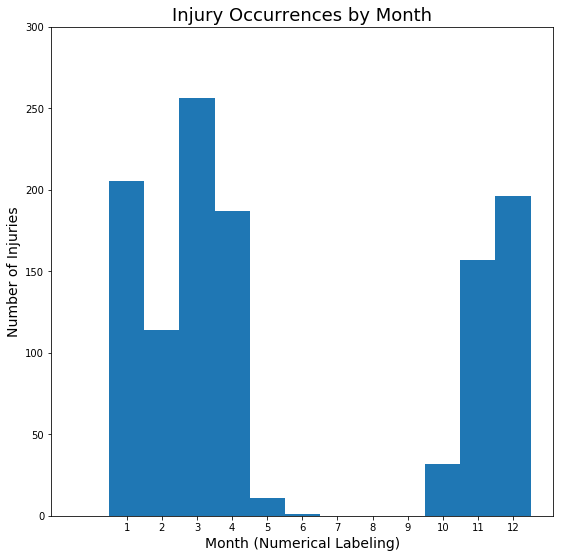

In [37]:
plt.figure(figsize = (9,9));
plt.hist(data[data['injury_suff'] == 1]['month'], bins=np.arange(14)-0.5);
plt.xticks(range(1, 13));
plt.title('Injury Occurrences by Month', size  = 18);
plt.ylabel('Number of Injuries', size = 14);
plt.xlabel('Month (Numerical Labeling)', size = 14);
plt.ylim([0, 300]);

We note that there is a clear spike in injuries in March and April.  The NBA season runs from October to April, so this general trend makes sense and gives an indicator of our first potential feature to include in the model - that injuries become more likely as the season progresses.  

We note that the decline in February injuries is possibly due to the NBA All Star game occurring in that month.

Another way of visualizing this point is to view this data in terms of season days passed.

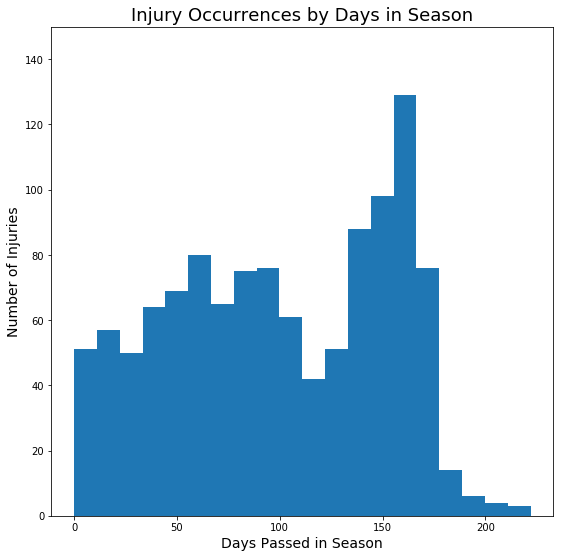

In [38]:
plt.figure(figsize = (9,9));
plt.hist(data[data['injury_suff'] == 1]['season_days'], bins=20);
plt.title('Injury Occurrences by Days in Season', size  = 18);
plt.ylabel('Number of Injuries', size = 14);
plt.xlabel('Days Passed in Season', size = 14);
plt.ylim([0, 150]);

There appears to be something of a an upward trend here although it is not too strong of a correlation.

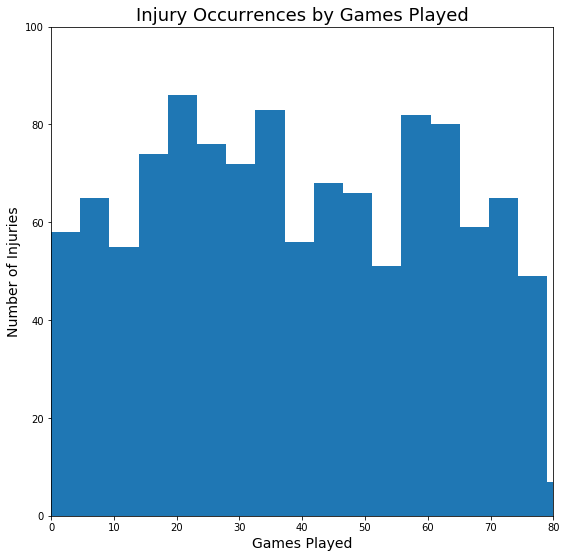

In [39]:
plt.figure(figsize = (9,9));
plt.hist(data[data['injury_suff'] == 1]['games_to_date'], bins=20);
plt.title('Injury Occurrences by Games Played', size  = 18);
plt.ylabel('Number of Injuries', size = 14);
plt.xlabel('Games Played', size = 14);
plt.ylim([0, 100]);
plt.xlim([0, 80]);

We do not see quite the same trend here - perhaps the season games to date already captured this variation.

## Correlation Deep Dive

### Injury in Next Month Correlations

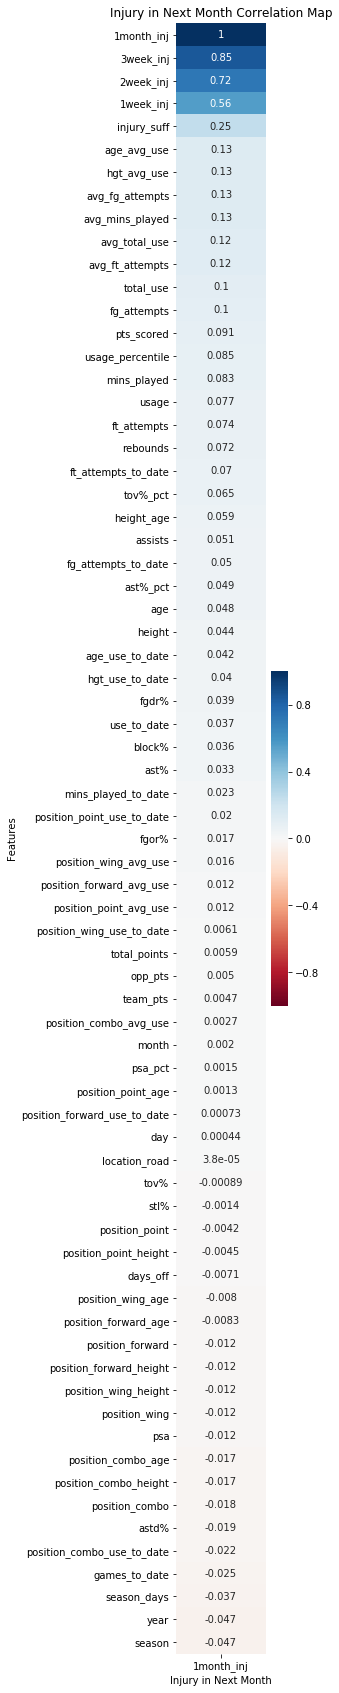

In [40]:
plt.figure(figsize = (2, 30))
sns.heatmap(data.corr()[['1month_inj']].sort_values('1month_inj', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Injury in Next Month Correlation Map');
plt.xlabel('Injury in Next Month');
plt.ylabel('Features');


### Injury in Next Three Weeks Correlations

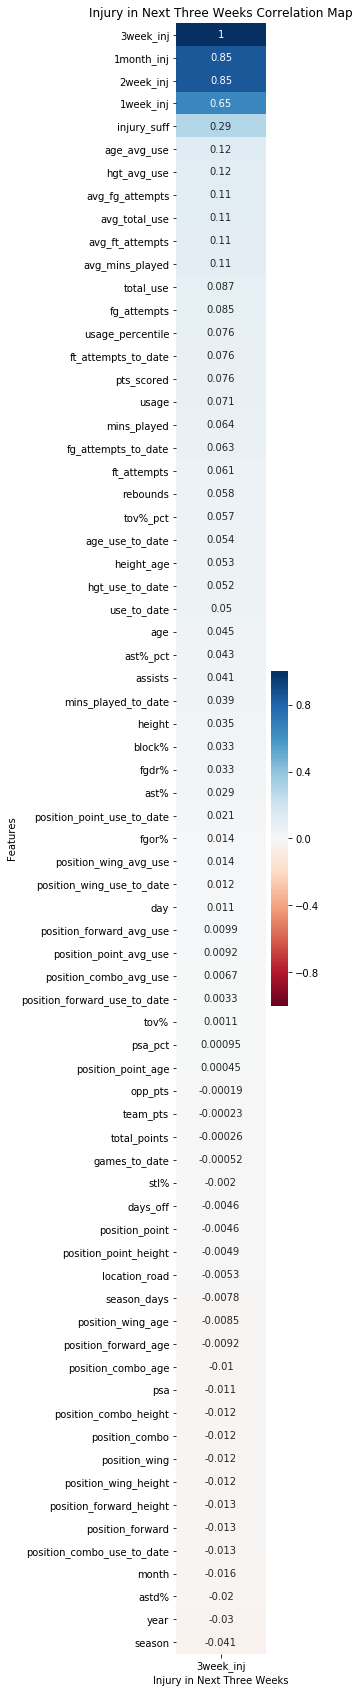

In [41]:
plt.figure(figsize = (2, 30))
sns.heatmap(data.corr()[['3week_inj']].sort_values('3week_inj', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Injury in Next Three Weeks Correlation Map');
plt.xlabel('Injury in Next Three Weeks');
plt.ylabel('Features');

### Injury in Next Two Weeks

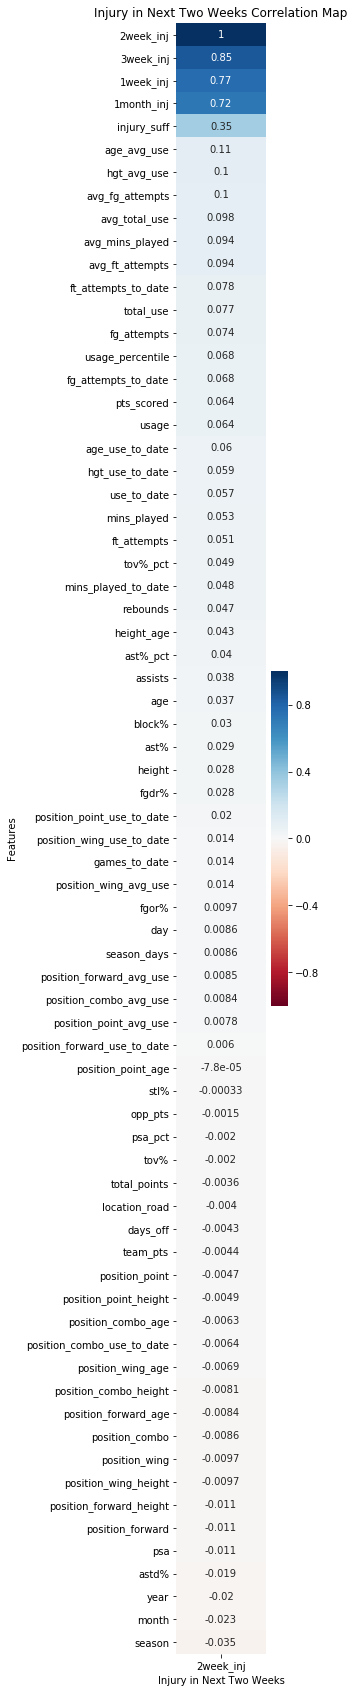

In [42]:
plt.figure(figsize = (2, 30))
sns.heatmap(data.corr()[['2week_inj']].sort_values('2week_inj', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Injury in Next Two Weeks Correlation Map');
plt.xlabel('Injury in Next Two Weeks');
plt.ylabel('Features');

### Injury in Next Week

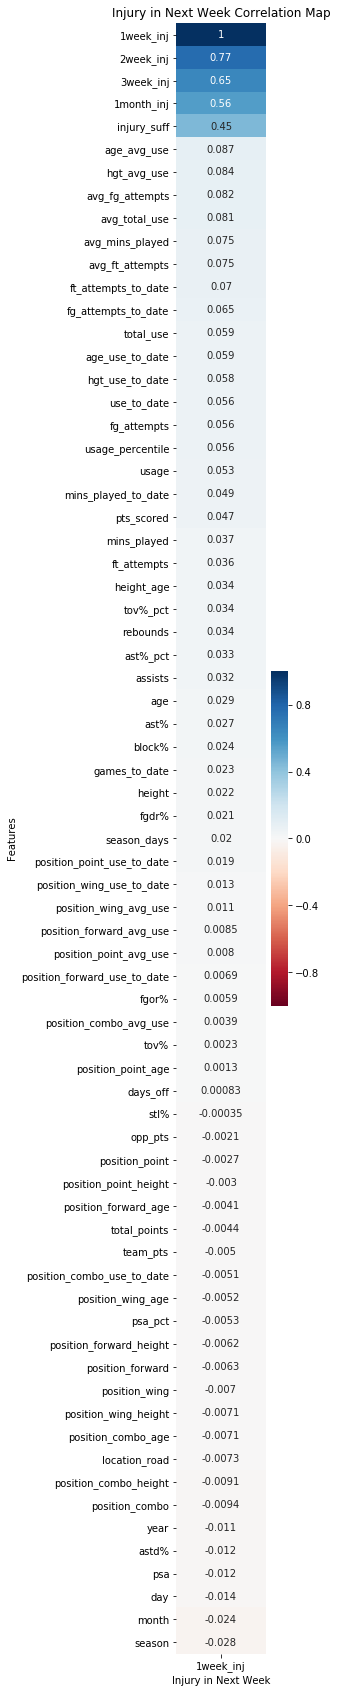

In [43]:
plt.figure(figsize = (2, 30))
sns.heatmap(data.corr()[['1week_inj']].sort_values('1week_inj', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Injury in Next Week Correlation Map');
plt.xlabel('Injury in Next Week');
plt.ylabel('Features');

### Injury in Upcoming Game

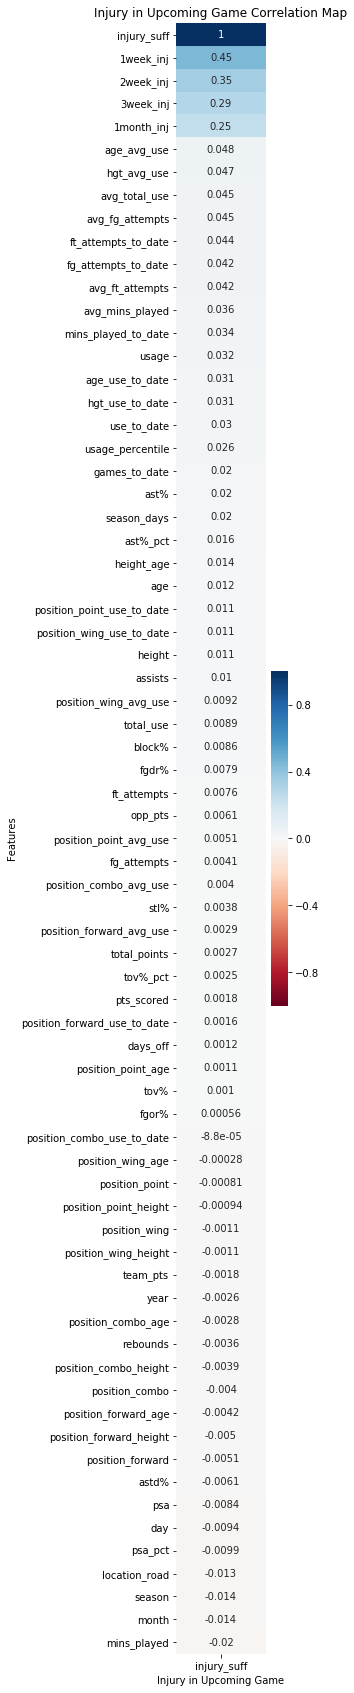

In [44]:
plt.figure(figsize = (2, 30))
sns.heatmap(data.corr()[['injury_suff']].sort_values('injury_suff', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Injury in Upcoming Game Correlation Map');
plt.xlabel('Injury in Upcoming Game');
plt.ylabel('Features');

# 8. Saving Modeling Data Frame

In [45]:
data.to_csv('../data/modeling_data.csv')